In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [27]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [28]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [29]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [30]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [31]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [32]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [33]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

In [34]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))


history = model.fit(x_train,
                    steps_per_epoch=500,
                    epochs=2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1D Convolutional Model

In [ ]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 87

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(1, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 8
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


1D CN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=350,
                    epochs=20)

GRU

Tentativo 0

In [ ]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics=['accuracy'])
history0= model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)


Epoch 1/40
500/500 [==============================] - 3s 2ms/step - loss: 0.3222 - accuracy: 0.8420
Epoch 2/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9360
Epoch 3/40
500/500 [==============================] - 1s 3ms/step - loss: 0.1427 - accuracy: 0.9580
Epoch 4/40
500/500 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9620
Epoch 5/40
500/500 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9640
Epoch 6/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9700
Epoch 7/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9760
Epoch 8/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9700
Epoch 9/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9680
Epoch 10/40
500/500 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9700

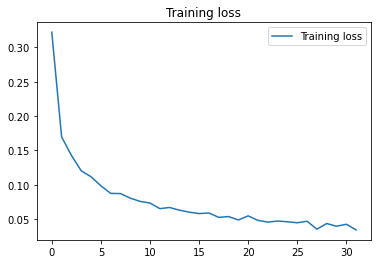

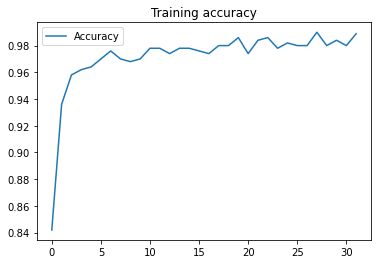

In [39]:
loss = history0.history['loss']
acc = history0.history['accuracy']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()


plt.figure()

plt.plot(epochs, acc, label='Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.show()

Tentativo 1

In [38]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64, input_shape=(None, x_train.shape[-1]), return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history1 = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)


Epoch 1/40
500/500 [==============================] - 5s 4ms/step - loss: 0.2321 - accuracy: 0.9220
Epoch 2/40
500/500 [==============================] - 2s 3ms/step - loss: 0.0960 - accuracy: 0.9640
Epoch 3/40
500/500 [==============================] - 2s 3ms/step - loss: 0.0572 - accuracy: 0.9860
Epoch 4/40
500/500 [==============================] - 2s 4ms/step - loss: 0.0242 - accuracy: 0.9940
Epoch 5/40
500/500 [==============================] - 2s 3ms/step - loss: 0.0111 - accuracy: 0.9980
Epoch 6/40
500/500 [==============================] - 2s 3ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 7/40
500/500 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 8/40
500/500 [==============================] - 2s 3ms/step - loss: 7.1769e-04 - accuracy: 1.0000
Epoch 9/40
500/500 [==============================] - 2s 4ms/step - loss: 3.7917e-04 - accuracy: 1.0000
Epoch 10/40
500/500 [==============================] - 2s 3ms/step - loss: 2.1326e-04 - accu

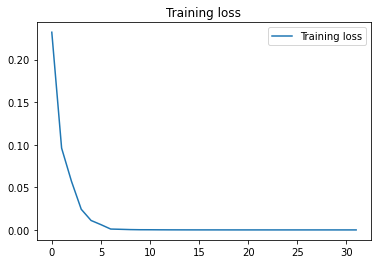

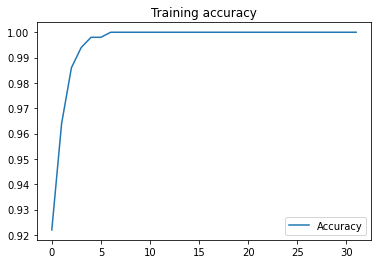

In [40]:
loss = history1.history['loss']
acc = history1.history['accuracy']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()


plt.figure()

plt.plot(epochs, acc, label='Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.show()

Tentativo 2

In [48]:
from keras import layers, optimizers
from keras.models import Sequential

model = Sequential()
model.add(layers.GRU(64, input_shape=(None, x_train.shape[-1]), return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(x_train,
                    y_train,
                    batch_size=32,  # Modifica: Riduci le dimensioni del batch
                    epochs=40)  # Modifica: Aumenta il numero di epoche




Epoch 1/40
13/13 [==============================] - 7s 7ms/step - loss: 0.5991 - accuracy: 0.7653
Epoch 2/40
13/13 [==============================] - 0s 7ms/step - loss: 0.4047 - accuracy: 0.9082
Epoch 3/40
13/13 [==============================] - 0s 6ms/step - loss: 0.2830 - accuracy: 0.9184
Epoch 4/40
13/13 [==============================] - 0s 7ms/step - loss: 0.2133 - accuracy: 0.9311
Epoch 5/40
13/13 [==============================] - 0s 7ms/step - loss: 0.1735 - accuracy: 0.9413
Epoch 6/40
13/13 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.9592
Epoch 7/40
13/13 [==============================] - 0s 7ms/step - loss: 0.1282 - accuracy: 0.9592
Epoch 8/40
13/13 [==============================] - 0s 6ms/step - loss: 0.1140 - accuracy: 0.9617
Epoch 9/40
13/13 [==============================] - 0s 7ms/step - loss: 0.1019 - accuracy: 0.9643
Epoch 10/40
13/13 [==============================] - 0s 7ms/step - loss: 0.0911 - accuracy: 0.9719
Epoch 11/40
13/13 [

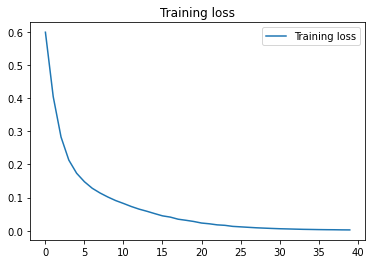

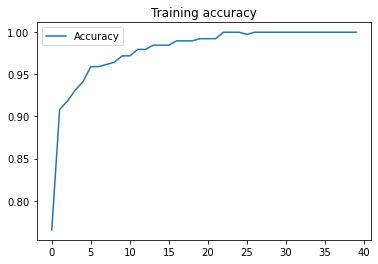

In [49]:
loss = history2.history['loss']
acc = history2.history['accuracy']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()


plt.figure()

plt.plot(epochs, acc, label='Accuracy')
plt.title('Training accuracy')
plt.legend()

plt.show()

Tentativo 3

Confronto original, tentativo1, tentativo 2 e tentativo 3 


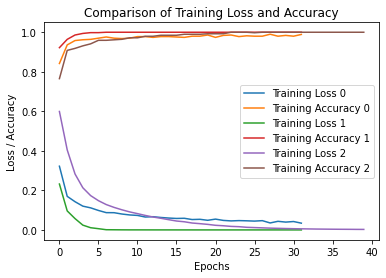

In [50]:
import matplotlib.pyplot as plt

# Primo plot (tentativo 0)
loss0 = history0.history['loss']
acc0 = history0.history['accuracy']
epochs0 = range(len(loss0))
plt.plot(epochs0, loss0, label='Training Loss 0')
plt.plot(epochs0, acc0, label='Training Accuracy 0')

# Secondo plot (tentativo 1)
loss1 = history1.history['loss']
acc1 = history1.history['accuracy']
epochs1 = range(len(loss1))
plt.plot(epochs1, loss1, label='Training Loss 1')
plt.plot(epochs1, acc1, label='Training Accuracy 1')

# Terzo plot (tentativo 2)
loss2 = history2.history['loss']
acc2 = history2.history['accuracy']
epochs2 = range(len(loss2))
plt.plot(epochs2, loss2, label='Training Loss 2')
plt.plot(epochs2, acc2, label='Training Accuracy 2')


# Grafico combinato
plt.title('Comparison of Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()

# Mostra il grafico
plt.show()

Dropout 0

Epoch 1/40
500/500 [==============================] - 2s 2ms/step - loss: 0.3820 - accuracy: 0.8120
Epoch 2/40
500/500 [==============================] - 1s 2ms/step - loss: 0.2452 - accuracy: 0.9180
Epoch 3/40
500/500 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9320
Epoch 4/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1702 - accuracy: 0.9580
Epoch 5/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1578 - accuracy: 0.9500
Epoch 6/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1399 - accuracy: 0.9740
Epoch 7/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9620
Epoch 8/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9680
Epoch 9/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1170 - accuracy: 0.9740
Epoch 10/40
500/500 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9760

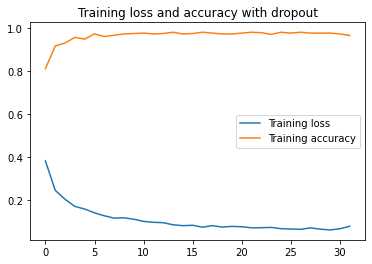

In [ ]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae', metrics=["accuracy"])
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)


# Plot 

loss = history.history['loss']
acc = history.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()



Dropout tentativo 1

Epoch 1/40
500/500 [==============================] - 16s 21ms/step - loss: 0.3122 - accuracy: 0.8820
Epoch 2/40
500/500 [==============================] - 11s 21ms/step - loss: 0.1693 - accuracy: 0.9500
Epoch 3/40
500/500 [==============================] - 10s 20ms/step - loss: 0.1254 - accuracy: 0.9620
Epoch 4/40
500/500 [==============================] - 10s 20ms/step - loss: 0.1034 - accuracy: 0.9660
Epoch 5/40
500/500 [==============================] - 10s 20ms/step - loss: 0.0917 - accuracy: 0.9740
Epoch 6/40
500/500 [==============================] - 10s 20ms/step - loss: 0.0648 - accuracy: 0.9840
Epoch 7/40
500/500 [==============================] - 10s 20ms/step - loss: 0.0640 - accuracy: 0.9800
Epoch 8/40
500/500 [==============================] - 10s 19ms/step - loss: 0.0789 - accuracy: 0.9800
Epoch 9/40
500/500 [==============================] - 10s 19ms/step - loss: 0.0532 - accuracy: 0.9820
Epoch 10/40
500/500 [==============================] - 10s 19ms/step - loss: 0.049

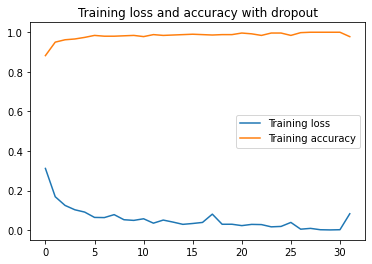

In [51]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history1 = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)

# Plot 

loss = history1.history['loss']
acc = history1.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()

Dropout tentativo 2 

Epoch 1/40
500/500 [==============================] - 16s 20ms/step - loss: 0.2740 - accuracy: 0.8940
Epoch 2/40
500/500 [==============================] - 10s 20ms/step - loss: 0.1478 - accuracy: 0.9520
Epoch 3/40
500/500 [==============================] - 10s 20ms/step - loss: 0.1009 - accuracy: 0.9720
Epoch 4/40
500/500 [==============================] - 10s 20ms/step - loss: 0.1053 - accuracy: 0.9560
Epoch 5/40
500/500 [==============================] - 10s 20ms/step - loss: 0.0609 - accuracy: 0.9800
Epoch 6/40
500/500 [==============================] - 11s 21ms/step - loss: 0.0678 - accuracy: 0.9800
Epoch 7/40
500/500 [==============================] - 11s 22ms/step - loss: 0.0402 - accuracy: 0.9840
Epoch 8/40
500/500 [==============================] - 10s 20ms/step - loss: 0.0610 - accuracy: 0.9780
Epoch 9/40
500/500 [==============================] - 11s 21ms/step - loss: 0.0550 - accuracy: 0.9860
Epoch 10/40
500/500 [==============================] - 10s 20ms/step - loss: 0.034

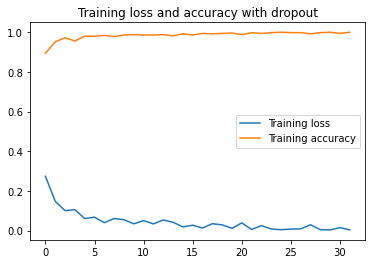

In [54]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.15,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history2 = model.fit(x_train,
                    y_train,
                    steps_per_epoch=500,
                    epochs=40)

# Plot 

loss = history2.history['loss']
acc = history2.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training loss and accuracy with dropout')
plt.legend()

plt.show()

Dropout 3 (2 dropout applicati)

Epoch 1/40
13/13 [==============================] - 9s 40ms/step - loss: 0.7007 - accuracy: 0.4056
Epoch 2/40
13/13 [==============================] - 1s 40ms/step - loss: 0.6925 - accuracy: 0.5077
Epoch 3/40
13/13 [==============================] - 1s 40ms/step - loss: 0.6795 - accuracy: 0.6735
Epoch 4/40
13/13 [==============================] - 1s 48ms/step - loss: 0.6467 - accuracy: 0.7423
Epoch 5/40
13/13 [==============================] - 1s 42ms/step - loss: 0.5367 - accuracy: 0.8571
Epoch 6/40
13/13 [==============================] - 1s 41ms/step - loss: 0.2958 - accuracy: 0.9133
Epoch 7/40
13/13 [==============================] - 1s 40ms/step - loss: 0.2144 - accuracy: 0.9311
Epoch 8/40
13/13 [==============================] - 1s 40ms/step - loss: 0.1719 - accuracy: 0.9439
Epoch 9/40
13/13 [==============================] - 1s 43ms/step - loss: 0.1580 - accuracy: 0.9490
Epoch 10/40
13/13 [==============================] - 1s 41ms/step - loss: 0.1583 - accuracy: 0.9490
Epoch 11/

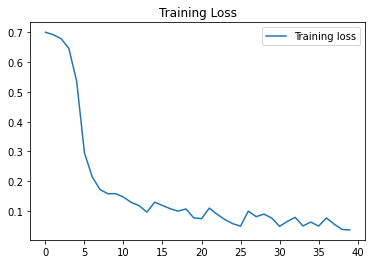

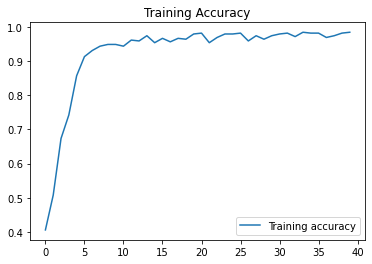

In [55]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dropout(0.3))  # Added dropout layer
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 32  # You can experiment with different batch sizes
epochs = 40

history3 = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs)

# Plotting
loss = history3.history['loss']
acc = history3.history['accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

Early stopping + validation

Epoch 1/100
10/10 [==============================] - 8s 190ms/step - loss: 0.6925 - accuracy: 0.4665 - val_loss: 0.6916 - val_accuracy: 0.6076
Epoch 2/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6890 - accuracy: 0.6518 - val_loss: 0.6866 - val_accuracy: 0.6582
Epoch 3/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6780 - accuracy: 0.7412 - val_loss: 0.6731 - val_accuracy: 0.7595
Epoch 4/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6590 - accuracy: 0.7732 - val_loss: 0.6393 - val_accuracy: 0.8481
Epoch 5/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6117 - accuracy: 0.8147 - val_loss: 0.5548 - val_accuracy: 0.8608
Epoch 6/100
10/10 [==============================] - 0s 51ms/step - loss: 0.4545 - accuracy: 0.9042 - val_loss: 0.3178 - val_accuracy: 0.9114
Epoch 7/100
10/10 [==============================] - 0s 46ms/step - loss: 0.2281 - accuracy: 0.9393 - val_loss: 0.2406 - val_accuracy: 0.9367
Epoch

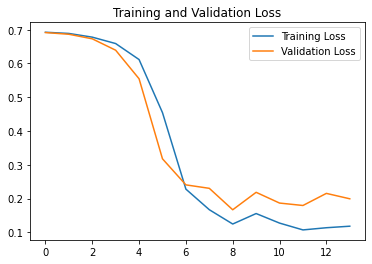

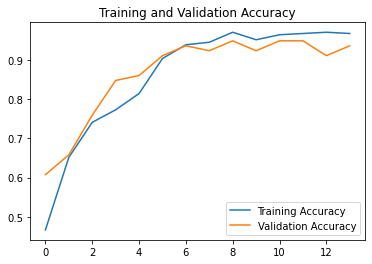

In [68]:
from keras import optimizers
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import GRU, Reshape, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definizione del modello
model = Sequential()
model.add(GRU(64,
              dropout=0.2,
              recurrent_dropout=0.2,
              input_shape=(None, x_train.shape[-1])))
model.add(Reshape((model.output_shape[1], 1)))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

# Addestramento con early stopping
history4 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Plot dell'andamento della loss e dell'accuracy
loss = history4.history['loss']
val_loss = history4.history['val_loss']
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



Confronto Dropout

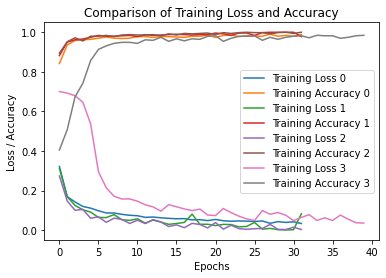

In [69]:

# Plot combinato
plt.figure()

# Primo plot
plt.plot(history0.history['loss'], label='Training Loss 0')
plt.plot(history0.history['accuracy'], label='Training Accuracy 0')


# Secondo plot
plt.plot(history1.history['loss'], label='Training Loss 1')
plt.plot(history1.history['accuracy'], label='Training Accuracy 1')

# terzo plot 
plt.plot(history2.history['loss'], label='Training Loss 2')
plt.plot(history2.history['accuracy'], label='Training Accuracy 2')

# quarto plot (con due dropout)
plt.plot(history3.history['loss'], label='Training Loss 3')
plt.plot(history3.history['accuracy'], label='Training Accuracy 3')


plt.title('Comparison of Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()

plt.show()

Dropout 1 + validation

Epoch 1/40
8/8 [==============================] - 5s 123ms/step - loss: 0.6934 - accuracy: 0.4520 - val_loss: 0.6886 - val_accuracy: 0.5397
Epoch 2/40
8/8 [==============================] - 0s 37ms/step - loss: 0.6885 - accuracy: 0.5920 - val_loss: 0.6825 - val_accuracy: 0.7460
Epoch 3/40
8/8 [==============================] - 0s 42ms/step - loss: 0.6816 - accuracy: 0.7520 - val_loss: 0.6727 - val_accuracy: 0.7778
Epoch 4/40
8/8 [==============================] - 0s 41ms/step - loss: 0.6697 - accuracy: 0.8120 - val_loss: 0.6567 - val_accuracy: 0.8095
Epoch 5/40
8/8 [==============================] - 0s 47ms/step - loss: 0.6480 - accuracy: 0.8320 - val_loss: 0.6295 - val_accuracy: 0.8095
Epoch 6/40
8/8 [==============================] - 0s 49ms/step - loss: 0.6154 - accuracy: 0.8520 - val_loss: 0.5805 - val_accuracy: 0.8730
Epoch 7/40
8/8 [==============================] - 0s 49ms/step - loss: 0.5433 - accuracy: 0.8720 - val_loss: 0.4823 - val_accuracy: 0.8889
Epoch 8/40
8/8 [==========

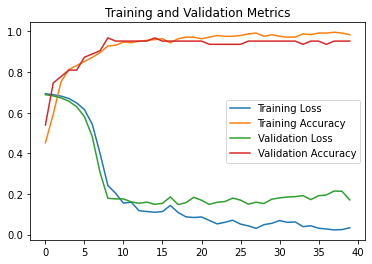

In [74]:
from keras import optimizers
from sklearn.model_selection import train_test_split

# Dividere i dati in training set e validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history5 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

# Plot

loss = history5.history['loss']
acc = history5.history['accuracy']
val_loss = history5.history['val_loss']
val_acc = history5.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

K FOLD

Average Training Loss: 0.10775990085676312
Average Training Accuracy: 0.9839999973773956
Average Validation Loss: 0.21052378043532372
Average Validation Accuracy: 0.9320000112056732


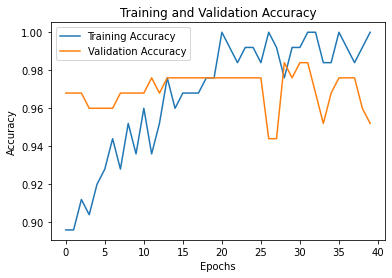

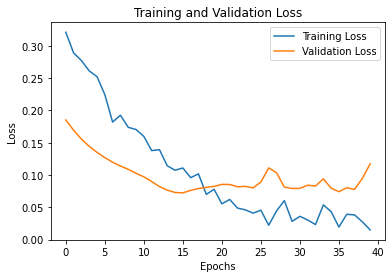

<Figure size 432x288 with 0 Axes>

In [106]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.15,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 2
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=40, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

kfold + test

Average Training Loss: 0.20781814058621725
Average Training Accuracy: 0.9659476280212402
Average Validation Loss: 0.24783137192328772
Average Validation Accuracy: 0.9560623367627462


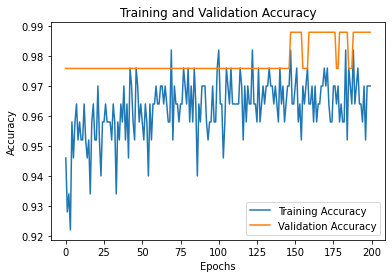

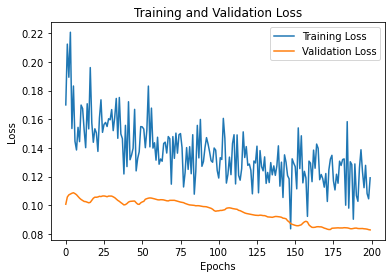

<Figure size 432x288 with 0 Axes>

6/6 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9762
Test Loss: 0.11103323847055435
Test Accuracy: 0.976190447807312


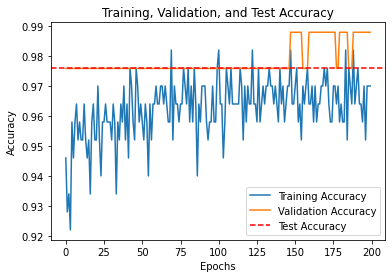

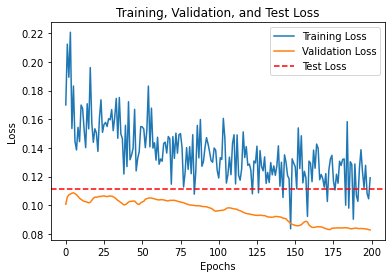

In [143]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.20,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 3
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=200, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

# Valutazione del modello sui dati di test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Grafico - Test Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Grafico - Test Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Average Training Loss: 0.407500555117925
Average Training Accuracy: 0.835822323958079
Average Validation Loss: 0.43961552778879803
Average Validation Accuracy: 0.8161694606145223


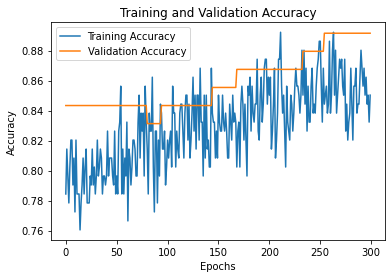

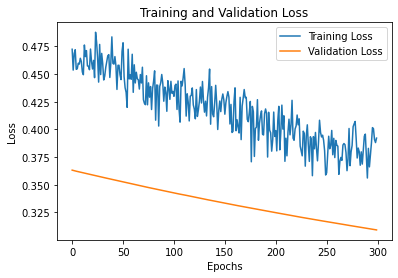

6/6 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8750
Test Loss: 0.3661941885948181
Test Accuracy: 0.875


Text(0.5, 1.0, 'Training')

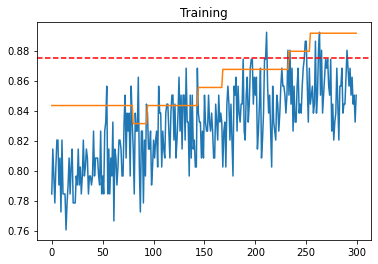

In [138]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.25,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))

model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.00001)  # Ridotto il learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 3
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=300, validation_data=(x_val_fold, y_val_fold), verbose=0)  # Aumentato il numero di epoche
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Valutazione del modello sui dati di test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Grafico - Test Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training')

Confronto tra solo dropout 1, rete con early stopping e rete con kfold

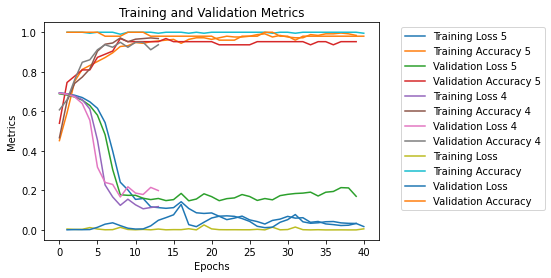

In [81]:
# Plot combinato
plt.figure()

# Primo plot
plt.plot(history5.history['loss'], label='Training Loss 5')
plt.plot(history5.history['accuracy'], label='Training Accuracy 5')
plt.plot(history5.history['val_loss'], label='Validation Loss 5')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy 5')

# Secondo plot
plt.plot(history4.history['loss'], label='Training Loss 4')
plt.plot(history4.history['accuracy'], label='Training Accuracy 4')
plt.plot(history4.history['val_loss'], label='Validation Loss 4')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy 4')

# Terzo plot (kfold)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')


plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Grafico con training e Validation

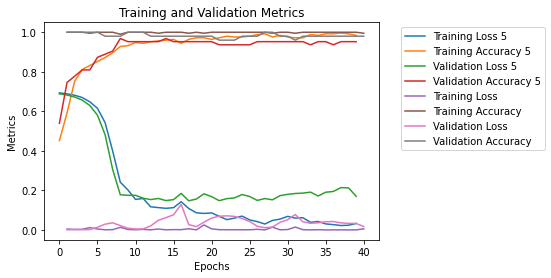

In [82]:
# Plot combinato
plt.figure()

# Primo plot
plt.plot(history5.history['loss'], label='Training Loss 5')
plt.plot(history5.history['accuracy'], label='Training Accuracy 5')
plt.plot(history5.history['val_loss'], label='Validation Loss 5')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy 5')



# Terzo plot (kfold)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')


plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Grafico con sole validation

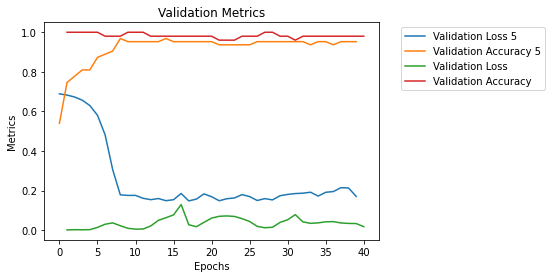

In [83]:
# Plot combinato
plt.figure()

# Primo plot
plt.plot(history5.history['val_loss'], label='Validation Loss 5')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy 5')



# Terzo plot (kfold)

plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')


plt.title('Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

LSTM 

In [ ]:
lstm_units = 128
dense_units = 32  

CompleteLSTM(x_train, x_test, y_train, y_test, results, ft, kf, perfInd, epochs, batch, lstm_units, dense_units, dropout_percentage, loss_function, metric)